# Leads Scoring
# Analysis Steps Followed and Contents

## 1. Reading and understanding the data
> ### 1.1 Checking the data properties
> ### 1.2 Cleaning the dataset
> ### 1.3 Outlier Treatment
> ### 1.4 EDA Inferances

## 2. Model Building
> ### 2.1 Seperating the Dependant and Independant variables
> ### 2.2 Train and Test Split
> ### 2.3 Logistic Model Building
> ### 2.4 Comparing the model output with train dataset output
> ### 2.5 Finding Optimal cutoff Point
> ### 2.6 Testing the model on test dataset 

## 3. Testing the model on test dataset 
## 4. Finding the Lead score value for conversion rate of 80%
## 5. Conclusion


# 1. Reading and understanding the data

In [1]:
# Imporing all the required libraries
import pandas as pd
import numpy as np
#import pandas_profiling as pp

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading the dataset into pandas dataframe
leads_df = pd.read_csv('Leads.csv')
leads_df.tail(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.0,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.0,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


## 1.1 Checking the data properties

In [3]:
# Pandas profiling
# ppReport = pp.ProfileReport(leads_df)
# ppReport.to_file(outputfile='Leads_PPreport.html')

In [4]:
# Checking for duplicate data
print('Number of Duplicates')
print(leads_df.duplicated().sum())
print('*****************')

# Checking the shape of dataframe
print('Data Frame shape',leads_df.shape)
print('***************')

# Checking the datatypes of all the columns
print(leads_df.info())
print('********************************************************************')

# Understaing the numerical variables
print('Description of numerical variables')
leads_df.describe()

Number of Duplicates
0
*****************
Data Frame shape (9240, 37)
***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Finding % of Missing Values
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## 1.2 Cleaning the dataset

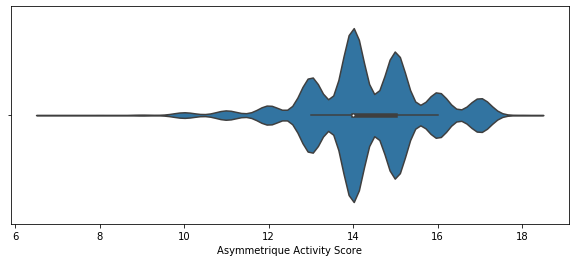

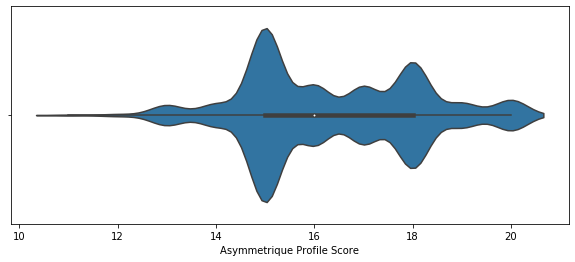

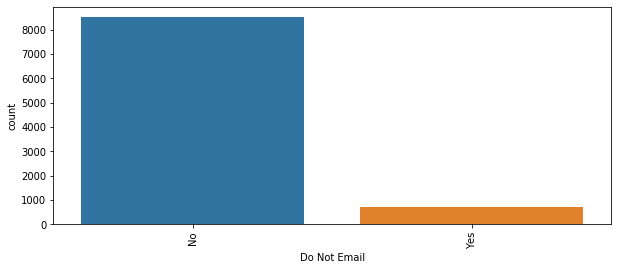

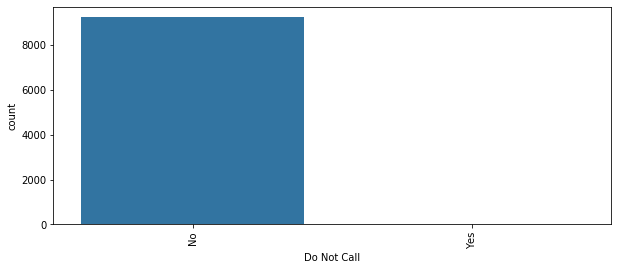

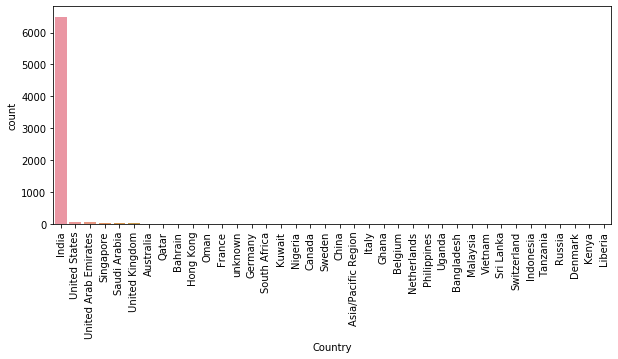

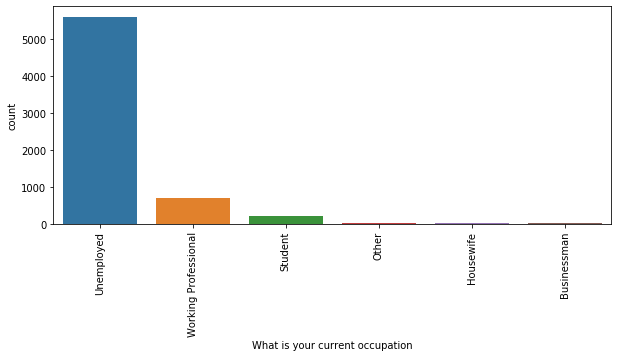

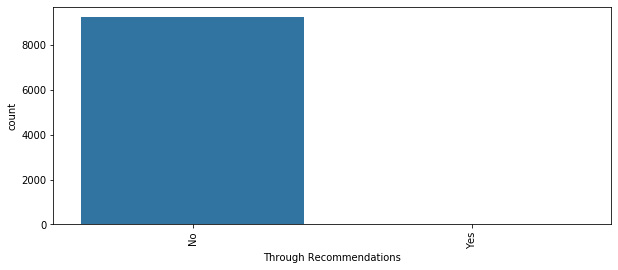

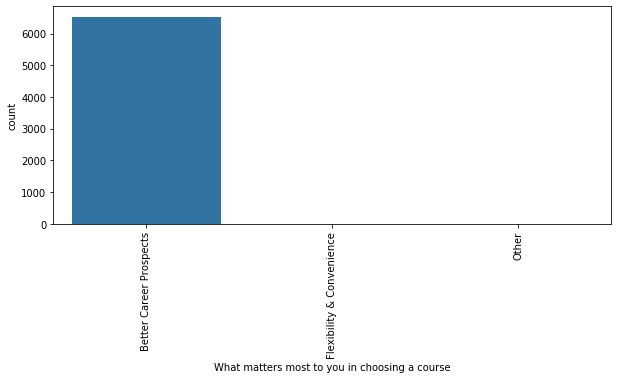

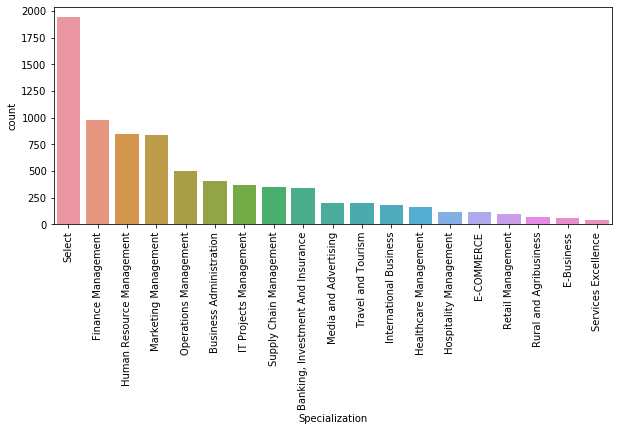

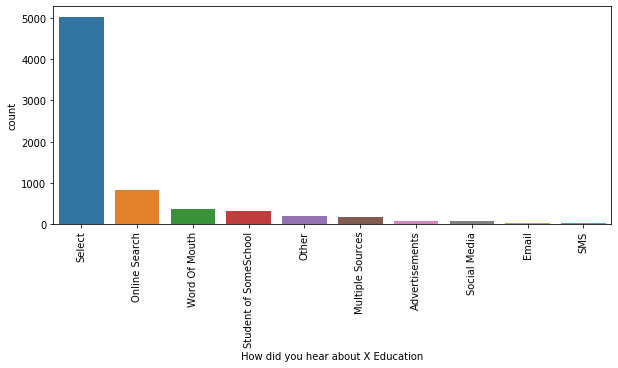

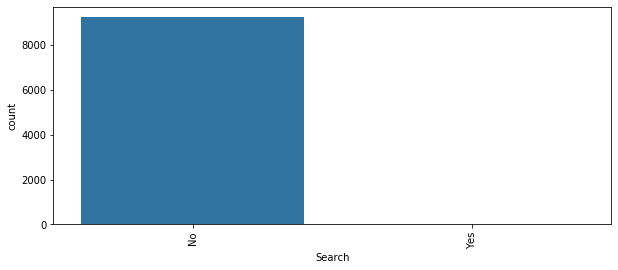

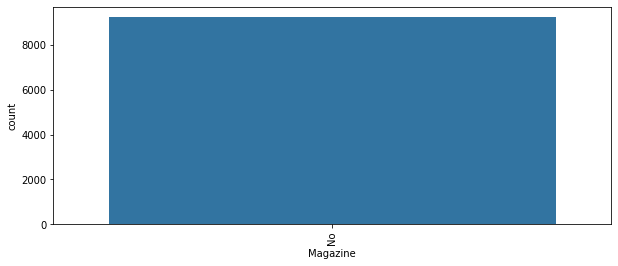

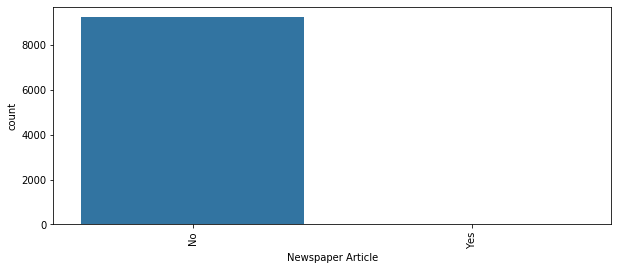

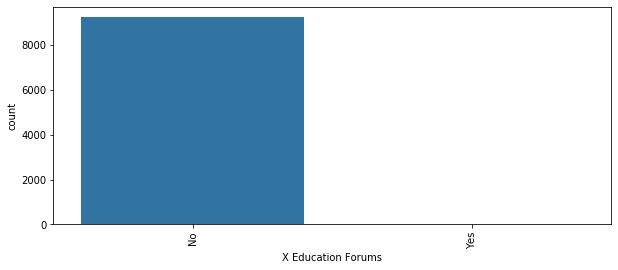

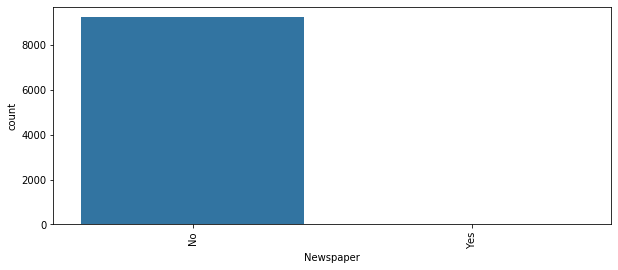

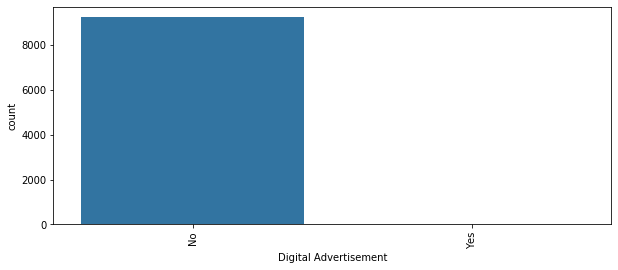

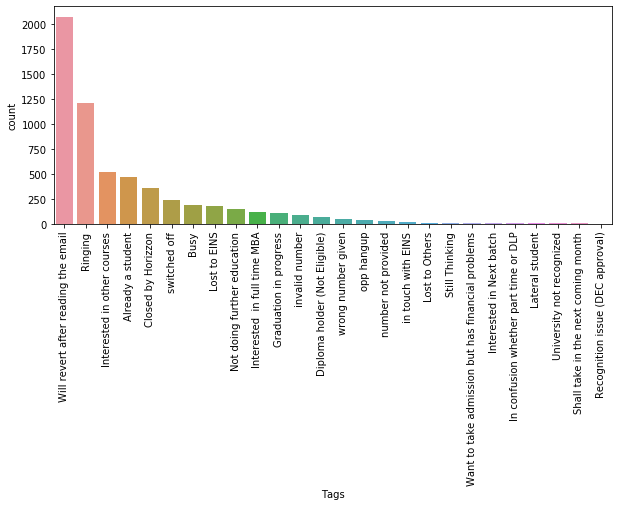

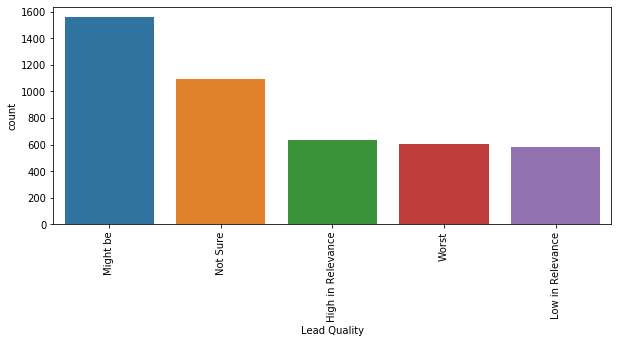

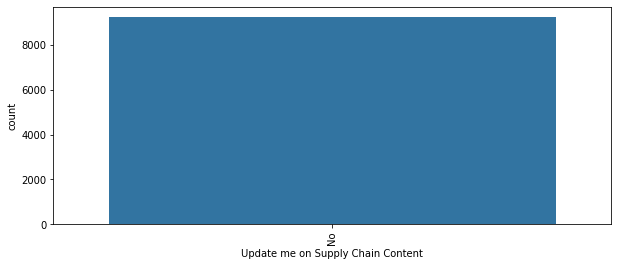

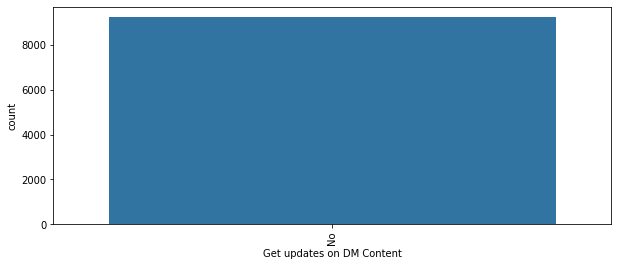

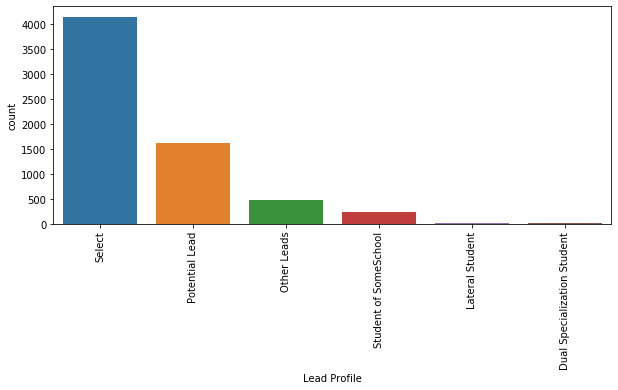

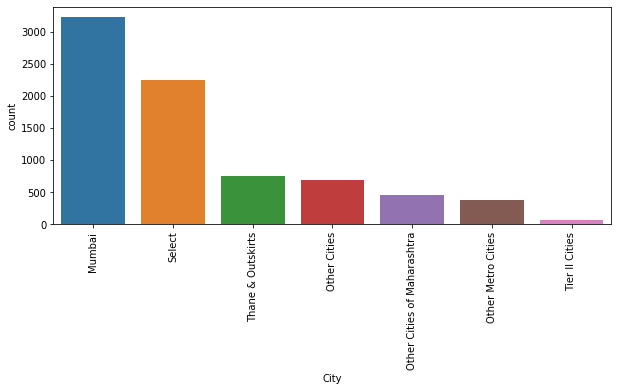

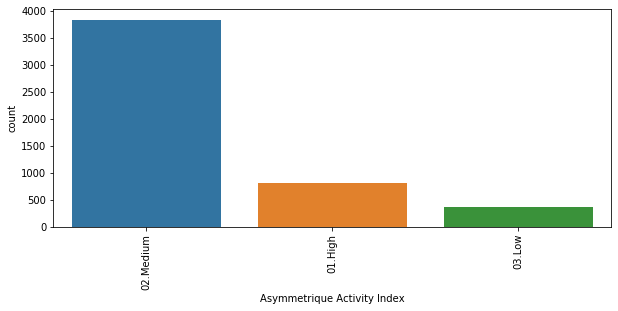

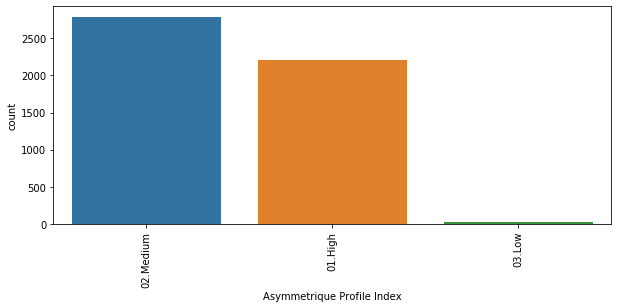

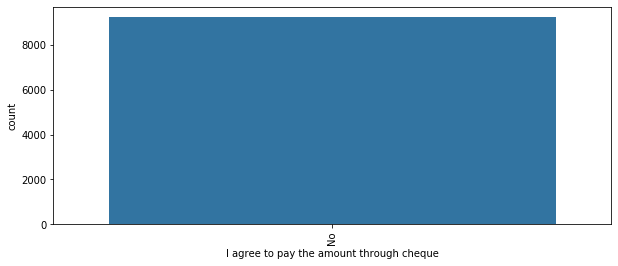

In [6]:
# Based on above observations and pandas profiling report, Below are the variables that may be removed

var_list = ['Prospect ID', 'Do Not Email', 'Do Not Call', 'Country', 'What is your current occupation', 
             'What matters most to you in choosing a course', 'Specialization', 'How did you hear about X Education',
             'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
             'Tags', 'Lead Quality',   'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 
             'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 
             'Asymmetrique Profile Score', 'I agree to pay the amount through cheque']

# Seperating the Numerical and categorical variables
num_list = [ 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', ]

cat_list = [ 'Do Not Email', 'Do Not Call', 'Country', 'What is your current occupation','Through Recommendations', 
             'What matters most to you in choosing a course', 'Specialization', 'How did you hear about X Education',
             'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
             'Tags', 'Lead Quality',   'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 
             'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index','I agree to pay the amount through cheque']

# Visualising Numerical variable to be removed for confirmation
for i in num_list:
  fig = plt.figure(figsize = (10,4))
  sns.violinplot(leads_df[i])
  plt.show()

# Visualising the categorical variables to be removed for confirmation
for i in cat_list:
  fig = plt.figure(figsize = (10,4))
  sns.countplot(leads_df[i], order = leads_df[i].value_counts().index)
  plt.xticks(rotation=90)
  plt.show()


**Columns to be Dropped**
1. Prospect ID is a unique Identifier. It will not add any information for model
2. Asymmetrique Activity Score, Asymmetrique Profile Score, Asymmetrique Profile Index and Asymmetrique Activity Index are generated values and we do not know the formulation. Also for these we cannot imput values for more than 45% records.
3. 'Do not email' and 'Do not call' has very less variation hence these do not add any value in the model.
4. In 'country', India has the maximun dominence in the data and for online education place should not matter that much.
5. 'What matters most to you in choosing a course' can be removed as it has mostly single selection and has missing values
6. 'Search','Magazine', 'Newspaper Article', 'Newspaper', 'Digital Advertisement' all have very less information. Can be dropped.
7. 'Tags' although has 36% missing values, the data can have important information of the status.
8. 'Update me on Supply Chain Content', 'Get updates on DM Content' have very less information, hence can be removed
9. 'City' can be removed as there is not much notable distributuin and has many null and select values.
10. 'I agree to pay the amount through cheque' has just No. Therefore can be removed.
11. 'Through Recommendations' has also very less information.


**Columns that can be kept**
1. 'What is your current occupation' has good info as per bussiness choice. It may bring out the potential targets for marketing.

2. 'Specialisation', although has 30%  missing values, has good amount of data with varity of options. This can bring out good patterns.

3. 'Lead quality' and 'Lead profile' also has good business relevance.


In [7]:
# Dropping the unwanted columns
leads_df2 = leads_df.drop(['Prospect ID', 'Do Not Email', 'Do Not Call', 'Country', 'What matters most to you in choosing a course', 
                             'How did you hear about X Education', 'Search', 'Magazine', 'Newspaper Article', 
                             'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Tags', 'Through Recommendations',
                             'Update me on Supply Chain Content', 'Get updates on DM Content',  'City', 
                             'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
                             'Asymmetrique Profile Score', 'I agree to pay the amount through cheque'], axis=1)
# Finding % of Missing Values
round(100*(leads_df2.isnull().sum()/len(leads_df2.index)), 2)


Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            15.56
What is your current occupation           29.11
Receive More Updates About Our Courses     0.00
Lead Quality                              51.59
Lead Profile                              29.32
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [8]:
# Imputing the values for high %ge null value variables

# Replacing the Speccilization contents: null values and select with 'Unknown'
leads_df2['Specialization'] = leads_df2['Specialization'].replace(np.nan, 'Select')
leads_df2['Specialization'] = leads_df2['Specialization'].replace('Select', 'Unknown')

# Replacing the null values of 'What is your current occupation' with 'Unknown'
leads_df2['What is your current occupation'] = leads_df2['What is your current occupation'].replace(np.nan, 'Unknown')

# 'Lead Quality' has 50% missing values has imputing the values with 'Unknown'
leads_df2['Lead Quality'] = leads_df2['Lead Quality'].replace(np.nan, 'Unknown')

# Replacing the 'Lead Profile' contents: null values and select with 'Unknown'
leads_df2['Lead Profile'] = leads_df2['Lead Profile'].replace(np.nan, 'Select')
leads_df2['Lead Profile'] = leads_df2['Lead Profile'].replace('Select', 'Unknown')

# Finding % of Missing Values
round(100*(leads_df2.isnull().sum()/len(leads_df2.index)), 2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Receive More Updates About Our Courses    0.00
Lead Quality                              0.00
Lead Profile                              0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [9]:
# Checking for any residual 'Select' in the dataframe if any
(leads_df2=='Select').sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Receive More Updates About Our Courses    0
Lead Quality                              0
Lead Profile                              0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

**There are no Select values left in dataframe**

In [10]:
# Dropping the rows with null values
leads_df2 = leads_df2.dropna()

# Checking the shape of dataframe
print('Shape of dataframe: ',leads_df2.shape)
print('********************************************')

# Finding % of Missing Values
print(round(100*(leads_df2.isnull().sum()/len(leads_df2.index)), 2))
print('********************************************')

# Missing rows %ge
print('%ge of missing data (Rows)',round((len(leads_df)-len(leads_df2))*100/(len(leads_df)),2),'%')

Shape of dataframe:  (9074, 15)
********************************************
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Receive More Updates About Our Courses    0.0
Lead Quality                              0.0
Lead Profile                              0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64
********************************************
%ge of missing data (Rows) 1.8 %


**Now data is clean**

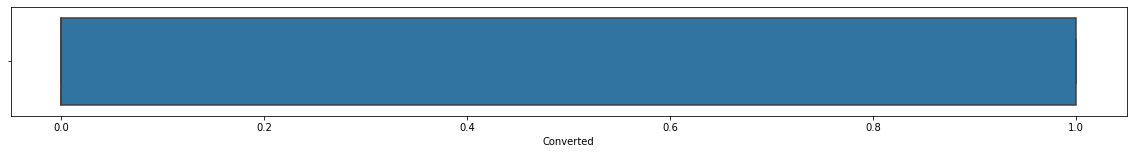

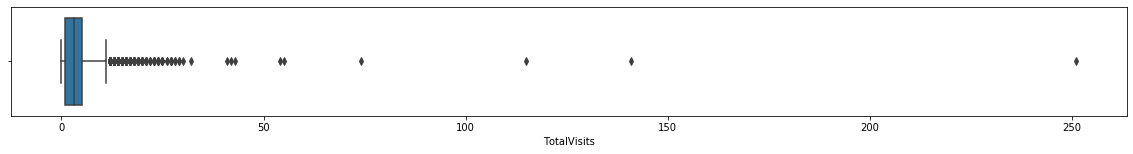

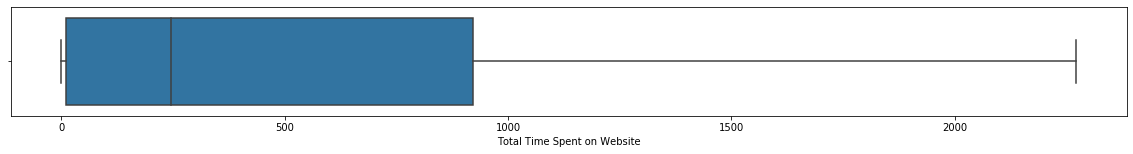

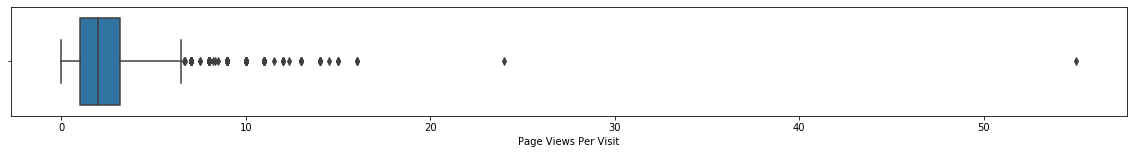

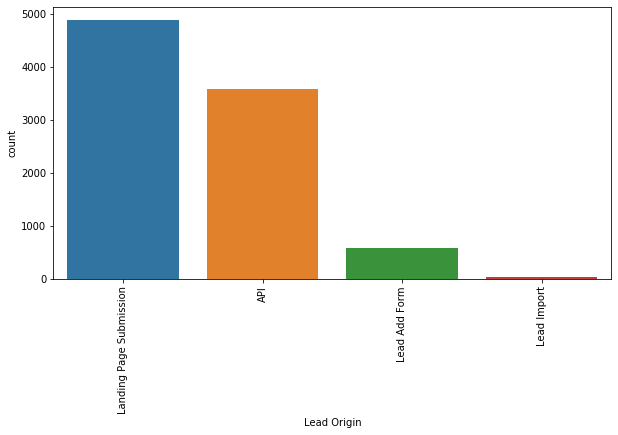

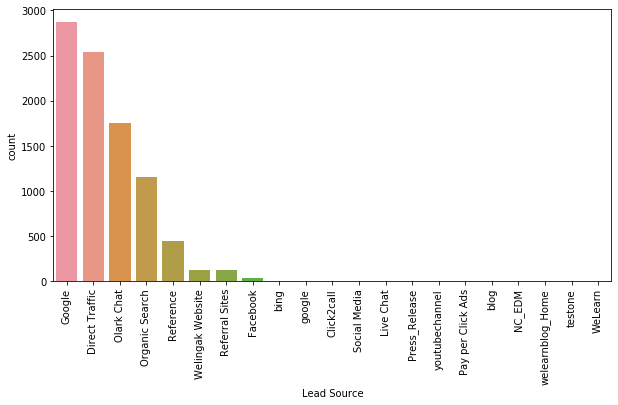

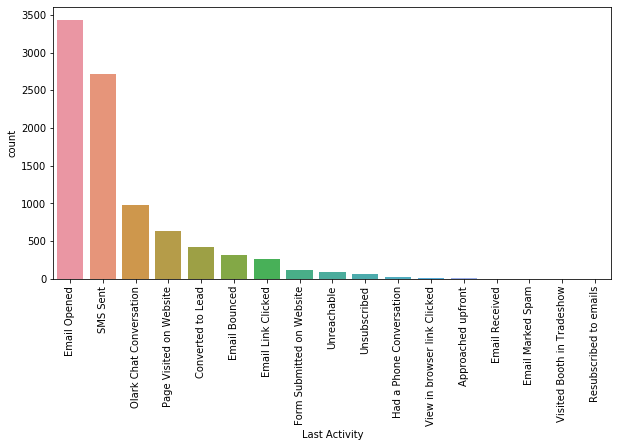

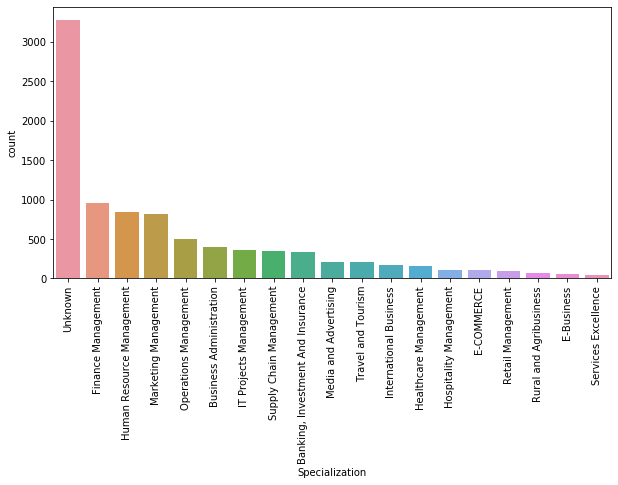

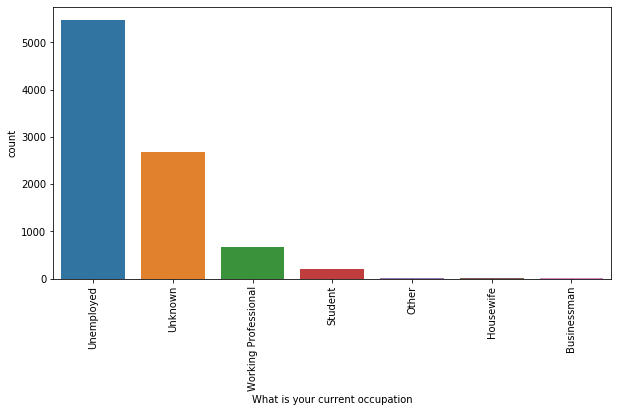

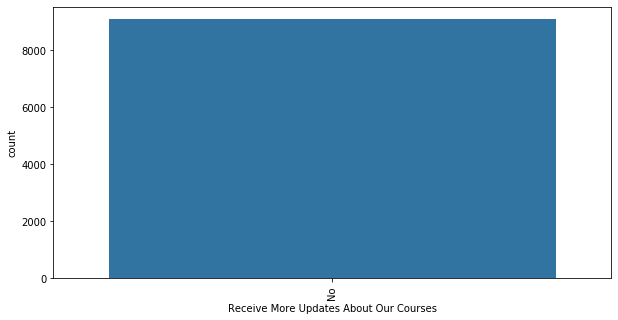

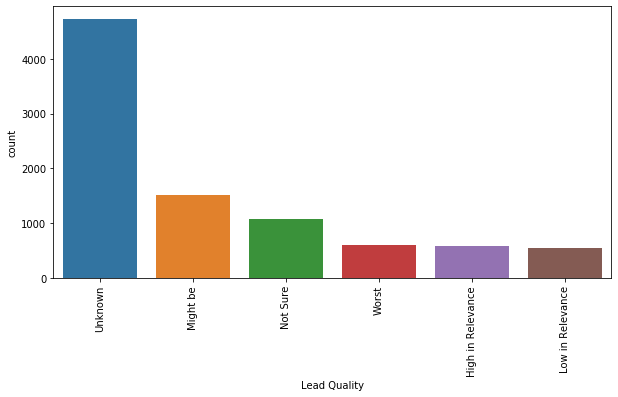

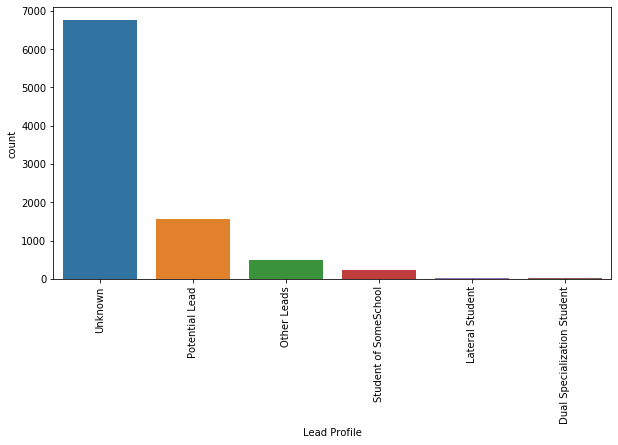

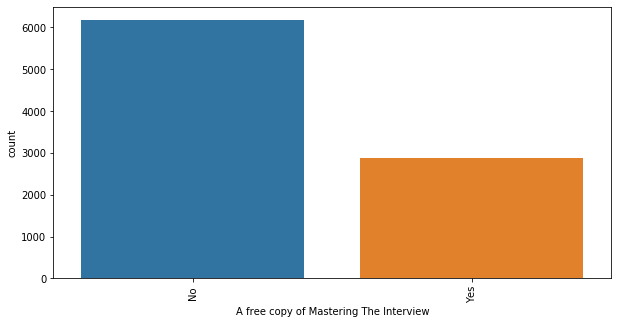

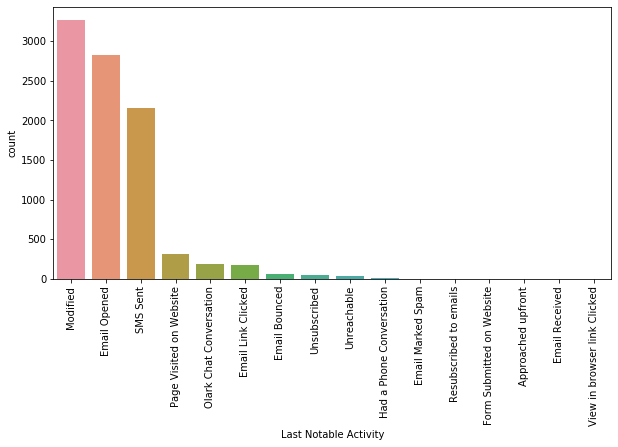

In [11]:
# Checking the individual values of each columns
col = leads_df2.columns

num_col = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', ]

cat_col = ['Lead Origin', 'Lead Source',  'Last Activity', 'Specialization', 'What is your current occupation', 
           'Receive More Updates About Our Courses', 'Lead Quality', 'Lead Profile', 
           'A free copy of Mastering The Interview', 'Last Notable Activity']

for i in num_col:
  fig = plt.figure(figsize=(20,2))
  sns.boxplot(leads_df2[i])
  plt.show()

for i in cat_col:
  fig = plt.figure(figsize=(10,5))
  sns.countplot(leads_df2[i], order = leads_df2[i].value_counts().index)
  plt.xticks(rotation = 90)
  plt.show()


## 1.3 Outlier Treatment

above 95 percentile value:  10.0


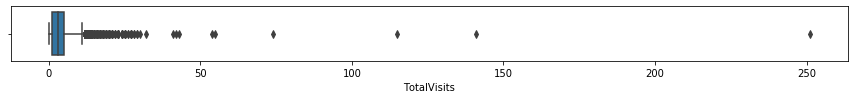

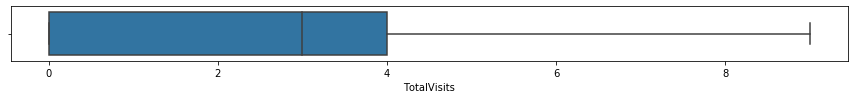

**********************************************************************************************************
above 95 percentile value:  6.0


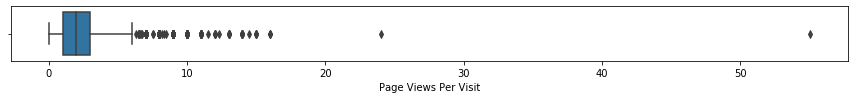

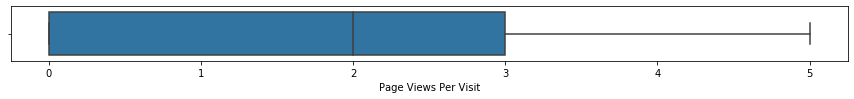

**********************************************************************************************************
Shape of dataframe:  (8124, 15)
%ge of missing data (Rows) 12.08 %


In [12]:
# Outlier Treatment
outliers = ['TotalVisits', 'Page Views Per Visit']
for col in outliers:
  limit = 0.95

  q = leads_df[col].quantile(limit)
  print('above 95 percentile value: ',q)

  leads_df2 = leads_df2[leads_df2[col]<q]  # Dataframe  after outliers removed
 
  fig = plt.figure(figsize =(15,1))
  sns.boxplot(leads_df[col])               # Box plot for original data for comparison
  plt.show()

  fig = plt.figure(figsize =(15,1))
  sns.boxplot(leads_df2[col])              # Box plot after outliers removed
  plt.show()
  print('**********************************************************************************************************')

# Missing rows %ge
print('Shape of dataframe: ',leads_df2.shape)
print('%ge of missing data (Rows)',round((len(leads_df)-len(leads_df2))*100/(len(leads_df)),2),'%')

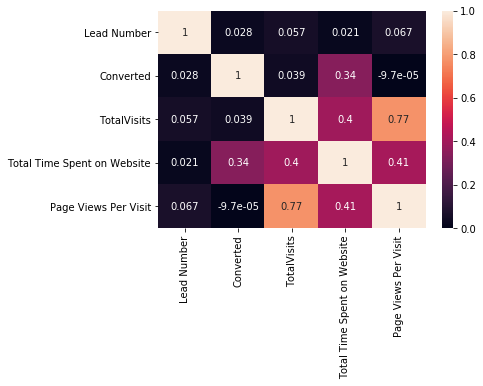

In [13]:
# Bivariate analysis of numerical variables
sns.heatmap(leads_df2.corr(), annot = True)

In [14]:
# Decreasing the number of values in categorical variables by combining the values
leads_df2['Lead Source'] = leads_df2['Lead Source'].replace(['google'], 'Google')

leads_df2['Lead Source'] = leads_df2['Lead Source'].replace(['bing','Click2call', 'Live Chat','Social Media', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
   'WeLearn',  'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Combined')

leads_df2['Last Activity'] = leads_df2['Last Activity'].replace(['Unreachable','Unsubscribed', 'Had a Phone Conversation','Approached upfront',
                                                                 'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                                 'Visited Booth in Tradeshow'], 'Combined')

leads_df2['Last Activity'] = leads_df2['Last Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable', 'Had a Phone Conversation', 'Email Marked Spam', 'Form Submitted on Website', 
                                                                 'Email Received', 'Resubscribed to emails', 'View in browser link Clicked', 'Approached upfront'], 'Combined')

leads_df2.tail(3)

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Receive More Updates About Our Courses,Lead Quality,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity
9237,579545,Landing Page Submission,Direct Traffic,0,2.0,199,2.0,SMS Sent,Business Administration,Unemployed,No,Not Sure,Potential Lead,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,1,3.0,499,3.0,SMS Sent,Human Resource Management,Unknown,No,Unknown,Unknown,No,SMS Sent
9239,579533,Landing Page Submission,Direct Traffic,1,6.0,1279,3.0,SMS Sent,Supply Chain Management,Unemployed,No,Might be,Potential Lead,Yes,Modified


In [15]:
# Binary Variables
bi_var = ['Receive More Updates About Our Courses','A free copy of Mastering The Interview']

# Numerical variables
num_var = ['Lead Number', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']

#Categorical Variables
cat_var = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation',
       'Lead Quality', 'Lead Profile',  'Last Notable Activity']

In [16]:
# Creating Dummy variables
leads_df2_dum = pd.get_dummies(leads_df2[cat_var], drop_first=True)

# Mearging with Dataframe
leads_df_final = pd.concat([leads_df2, leads_df2_dum], axis=1)
print(leads_df_final.shape)

# deleting the categorical variables
leads_df_final = leads_df_final.drop(cat_var, axis = 1)
print(leads_df_final.shape)


(8124, 81)
(8124, 73)


In [17]:
# Defining the map function for converting Yes & No TO 1 & 0

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df_final[bi_var] = leads_df_final[bi_var].apply(binary_map)

leads_df_final.head(3)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Receive More Updates About Our Courses,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Checking the conversion
conversion_ratio = (sum(leads_df_final['Converted'])/len(leads_df_final['Converted'].index))*100
conversion_ratio

37.456917774495324

## 1.4 EDA Inferances


1. The following columns are dropped: 
> ['Prospect ID', 'Do Not Email', 'Do Not Call', 'Country', 'What matters most to you in choosing a course', 'How did you hear about X Education', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Tags', 'Through Recommendations', 'Update me on Supply Chain Content', 'Get updates on DM Content',  'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque']

2. Outliers are removed by removing the values over 95 percentile.
3. Data has many null values. The values where there are very high, a new value 'Unknown' has been created not to cause any bias in the data
4. where ever the null values are very less, that is less than 2%, rows were deleted
5. Our Target variable **Converted** is positivly correlated with **Total time spent on website**
6. **Page views per visit** is highly correlated with **Total visits.**





# 2. Modelling

## 2.1 Seperating the Dependant and Independant variables

In [19]:
# creating a dataframe of target variable
y = leads_df_final['Converted']
print(y.head(3))

# Creating a data frame of independent variables
X = leads_df_final.drop(['Lead Number','Converted'], axis=1)
X.head(3)

0    0
1    0
2    1
Name: Converted, dtype: int64


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Receive More Updates About Our Courses,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## 2.2 Train and Test Split

In [20]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [21]:
# Scaling the numerical values
scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head(3)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Receive More Updates About Our Courses,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3994,-0.723054,0.921363,-0.615309,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
897,1.145076,-0.244296,-0.174197,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4030,0.678043,1.617057,1.359821,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## 2.3 Logistic Model Building

In [22]:
# Initial Logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5686
Model:                            GLM   Df Residuals:                     5615
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1824.2
Date:                Mon, 07 Oct 2019   Deviance:                       3648.4
Time:                        20:17:45   Pearson chi2:                 5.50e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   46.5512   1.35e+05      0.000      1.000   -2.64e+05    2.64e+05
TotalVisits                                              0.3032      0.069      4.422      0.000       0.169       0.438
Total Time Spent on Website                              1.0717      0.049     21.662      0.000       0.975       1.169
Page Views Per Visit                                    -0.2688      0.080     -3.369      0.001      -0.425      -0.112
Receive More Updates About Our Courses               -4.632e-09   2.27e-05     -0.000      1.000   -4.45e-05    4.45e-05
A free copy of Mastering The Interview                   0.1433      0.142      1.007      0.314      -0.136       0.422
Lead Origin_Landing Page Submission                     -0.5406      0.180     -2.997      0.003      -0.894      -0.187
Lead Origin_Lead Add Form                                0.5507      1.535      0.359      0.720      -2.457       3.558
Lead Origin_Lead Import                                 26.0207   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                              -1.0471      0.904     -1.158      0.247      -2.819       0.725
Lead Source_Facebook                                   -26.0633   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                      -0.7327      0.899     -0.815      0.415      -2.494       1.029
Lead Source_Olark Chat                                   0.5302      0.907      0.584      0.559      -1.248       2.309
Lead Source_Organic Search                              -0.9011      0.909     -0.992      0.321      -2.682       0.880
Lead Source_Reference                                    1.0747      1.270      0.846      0.397      -1.414       3.563
Lead Source_Referral Sites                              -1.2328      0.976     -1.263      0.207      -3.147       0.681
Lead Source_Welingak Website                             4.0812      1.440      2.834      0.005       1.259       6.904
Last Activity_Converted to Lead                          0.1696      0.337      0.503      0.615      -0.491       0.830
Last Activity_Email Link Clicked                         0.7921      0.474      1.672      0.094      -0.136       1.720
Last Activity_Email Opened                               0.7954      0.292      2.728      0.006       0.224       1.367
Last Activity_Olark Chat Conversation                   -0.3758      0.318     -1.184      0.237      -0.998       0.246
Last Activity_Page Visited on Website                    0.3063      0.366      0.836      0.403      -0.412       1.025
Last Activity_SMS Sent                                   1

In [23]:
# Feature Selection using RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [24]:
# Listing and ranking the features by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Receive More Updates About Our Courses', False, 57),
 ('A free copy of Mastering The Interview', False, 42),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 31),
 ('Lead Source_Facebook', False, 35),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 44),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', False, 6),
 ('Last Activity_Olark Chat Conversation', False, 15),
 ('Last Activity_Page Visited on Website', False, 47),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business A

In [25]:
# Storin the list of selected variables for building the LR Model
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure',
       'Lead Quality_Unknown', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model 1

In [26]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5686
Model:                            GLM   Df Residuals:                     5670
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1925.7
Date:                Mon, 07 Oct 2019   Deviance:                       3851.4
Time:                        20:17:47   Pearson chi2:                 5.94e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2225      0.143      8.547      0.000       0.942       1.503
Total Time Spent on Website                              1.0736      0.048     22.453      0.000       0.980       1.167
Lead Origin_Lead Add Form                                3.0162      0.284     10.636      0.000       2.460       3.572
Lead Origin_Lead Import                                  1.4107      0.655      2.153      0.031       0.126       2.695
Lead Source_Olark Chat                                   1.4486      0.119     12.214      0.000       1.216       1.681
Lead Source_Welingak Website                             2.9088      0.777      3.746      0.000       1.387       4.431
Last Activity_SMS Sent                                   1.4265      0.091     15.679      0.000       1.248       1.605
What is your current occupation_Housewife               21.5173   1.55e+04      0.001      0.999   -3.04e+04    3.05e+04
What is your current occupation_Working Professional     1.7873      0.237      7.557      0.000       1.324       2.251
Lead Quality_Might be                                   -1.4431      0.169     -8.552      0.000      -1.774      -1.112
Lead Quality_Not Sure                                   -3.3701      0.181    -18.637      0.000      -3.724      -3.016
Lead Quality_Unknown                                    -3.1762      0.149    -21.346      0.000      -3.468      -2.885
Lead Quality_Worst                                      -5.0945      0.375    -13.582      0.000      -5.830      -4.359
Last Notable Activity_Modified                          -1.0510      0.093    -11.358      0.000      -1.232      -0.870
Last Notable Activity_Olark Chat Conversation           -1.3772      0.365     -3.770      0.000      -2.093      -0.661
Last Notable Activity_Unreachable                        1.6669      0.711      2.346      0.019       0.274       3.060
========================================================================================================================
"""

In [27]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Lead Quality_Unknown,1.95
5,Last Activity_SMS Sent,1.76
8,Lead Quality_Might be,1.70
12,Last Notable Activity_Modified,1.68
3,Lead Source_Olark Chat,1.62
1,Lead Origin_Lead Add Form,1.58
4,Lead Source_Welingak Website,1.35
7,What is your current occupation_Working Profes...,1.32
0,Total Time Spent on Website,1.31
9,Lead Quality_Not Sure,1.21


In [28]:
col1 = col.drop('What is your current occupation_Housewife',1)
col1

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure',
       'Lead Quality_Unknown', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [29]:
# Model 2
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5686
Model:                            GLM   Df Residuals:                     5671
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1927.9
Date:                Mon, 07 Oct 2019   Deviance:                       3855.8
Time:                        20:17:47   Pearson chi2:                 5.94e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2386      0.143      8.675      0.000       0.959       1.518
Total Time Spent on Website                              1.0730      0.048     22.453      0.000       0.979       1.167
Lead Origin_Lead Add Form                                3.0166      0.283     10.645      0.000       2.461       3.572
Lead Origin_Lead Import                                  1.4038      0.656      2.139      0.032       0.118       2.690
Lead Source_Olark Chat                                   1.4452      0.119     12.190      0.000       1.213       1.678
Lead Source_Welingak Website                             2.9070      0.777      3.744      0.000       1.385       4.429
Last Activity_SMS Sent                                   1.4232      0.091     15.646      0.000       1.245       1.601
What is your current occupation_Working Professional     1.7798      0.237      7.522      0.000       1.316       2.244
Lead Quality_Might be                                   -1.4512      0.169     -8.610      0.000      -1.782      -1.121
Lead Quality_Not Sure                                   -3.3840      0.181    -18.729      0.000      -3.738      -3.030
Lead Quality_Unknown                                    -3.1909      0.149    -21.467      0.000      -3.482      -2.900
Lead Quality_Worst                                      -5.1099      0.375    -13.626      0.000      -5.845      -4.375
Last Notable Activity_Modified                          -1.0475      0.092    -11.333      0.000      -1.229      -0.866
Last Notable Activity_Olark Chat Conversation           -1.3773      0.365     -3.770      0.000      -2.093      -0.661
Last Notable Activity_Unreachable                        1.6634      0.711      2.339      0.019       0.270       3.057
========================================================================================================================
"""

In [30]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Quality_Unknown,1.95
5,Last Activity_SMS Sent,1.76
7,Lead Quality_Might be,1.70
11,Last Notable Activity_Modified,1.68
3,Lead Source_Olark Chat,1.62
1,Lead Origin_Lead Add Form,1.58
4,Lead Source_Welingak Website,1.35
6,What is your current occupation_Working Profes...,1.32
0,Total Time Spent on Website,1.31
8,Lead Quality_Not Sure,1.21


## 2.4 Comparing the model output with train dataset output

In [31]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_prob':y_train_pred})
y_train_pred_final['Lead_number'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_prob,Lead_number
0,0,0.432561,3994
1,0,0.098457,897
2,1,0.820911,4030
3,0,0.048830,4530
4,0,0.097580,1452


In [32]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conv_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(5)

,Converted,Conv_prob,Lead_number,predicted
0,0,0.432561,3994,0
1,0,0.098457,897,0
2,1,0.820911,4030,1
3,0,0.048830,4530,0
4,0,0.097580,1452,0


In [33]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8510376362996834


In [34]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3221  303]
 [ 544 1618]]


In [35]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [36]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7483811285846439

In [37]:
# Let us calculate specificity
TN / float(TN+FP)

0.9140181611804767

In [38]:
# Calculate false positive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08598183881952327


In [39]:
# positive predictive value 
print (TP / float(TP+FP))

0.8422696512233212


In [40]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8555112881806108


### Plotting ROC curve

In [41]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [42]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_prob, drop_intermediate = False )

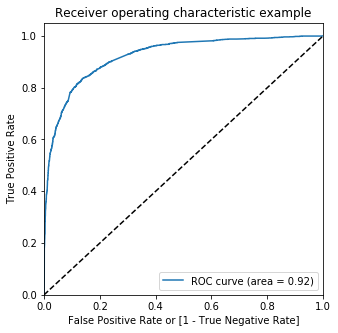

In [43]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_prob)

## 2.5 Finding Optimal cutoff Point

In [44]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_prob,Lead_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.432561,3994,0,1,1,1,1,1,0,0,0,0,0
1,0,0.098457,897,0,1,0,0,0,0,0,0,0,0,0
2,1,0.820911,4030,1,1,1,1,1,1,1,1,1,1,0
3,0,0.048830,4530,0,1,0,0,0,0,0,0,0,0,0
4,0,0.097580,1452,0,1,0,0,0,0,0,0,0,0,0


In [45]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380232  1.000000  0.000000
0.1   0.1  0.733380  0.963922  0.591941
0.2   0.2  0.815336  0.900555  0.763053
0.3   0.3  0.840134  0.853839  0.831725
0.4   0.4  0.854027  0.818224  0.875993
0.5   0.5  0.851038  0.748381  0.914018
0.6   0.6  0.849103  0.704903  0.937571
0.7   0.7  0.836792  0.638298  0.958570
0.8   0.8  0.819205  0.569380  0.972474
0.9   0.9  0.780162  0.443571  0.986663


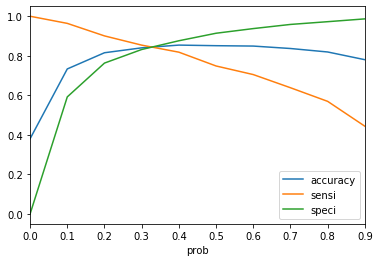

In [46]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], )
plt.show()

## 2.6 Re-evaluating the metrics using 32.5% as cutoff score

In [47]:
# From the curve above, 0.325 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_prob.map( lambda x: 1 if x > 0.325 else 0)
y_train_pred_final.head()

,Converted,Conv_prob,Lead_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.432561,3994,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.098457,897,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.820911,4030,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.048830,4530,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.097580,1452,0,1,0,0,0,0,0,0,0,0,0,0


In [48]:
# Adding the lead score column
y_train_pred_final['Lead_Score %ge'] = y_train_pred_final.Conv_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conv_prob,Lead_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score %ge
0,0,0.432561,3994,0,1,1,1,1,1,0,0,0,0,0,1,43
1,0,0.098457,897,0,1,0,0,0,0,0,0,0,0,0,0,10
2,1,0.820911,4030,1,1,1,1,1,1,1,1,1,1,0,1,82
3,0,0.048830,4530,0,1,0,0,0,0,0,0,0,0,0,0,5
4,0,0.097580,1452,0,1,0,0,0,0,0,0,0,0,0,0,10


In [49]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8445304256067534


In [50]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion)

[[2979  545]
 [ 339 1823]]


In [51]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [52]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8432007400555042

In [53]:
# Let us calculate specificity
TN / float(TN+FP)

0.8453461975028377

In [54]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.15465380249716232


In [55]:
# positive predictive value 
print (TP / float(TP+FP))

0.769847972972973


In [56]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8978300180831826


### Precision and Recall

In [57]:
print('Precision Value: ',precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted))
print('Recall Value: ',recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precision Value:  0.769847972972973
Recall Value:  0.8432007400555042


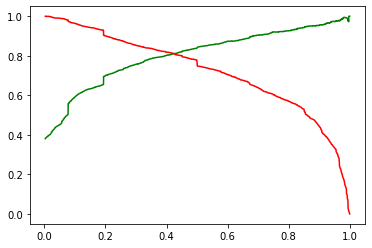

In [58]:
# Plotting Precession Recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 3 Testing the model on test dataset 

In [59]:
# Scaling the numerical variables
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Receive More Updates About Our Courses,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3117,-1.182239,-0.846272,-1.271582,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5735,1.041757,-0.467634,1.959450,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3135,-0.292641,-0.249405,0.020831,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1663,-1.182239,-0.846272,-1.271582,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3386,2.820953,-0.253135,0.667037,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Using the columns used in the final model
X_test = X_test[col1]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Working Professional,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Unknown,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
3117,-0.846272,0,0,1,0,0,0,0,0,1,0,1,0,0
5735,-0.467634,0,0,0,0,0,0,0,0,0,1,1,0,0
3135,-0.249405,0,0,0,0,0,0,0,0,1,0,0,0,0
1663,-0.846272,1,0,0,1,1,0,0,0,1,0,1,0,0
3386,-0.253135,0,0,0,0,0,0,0,0,1,0,0,0,0


In [61]:
# Predicting the outputs in the test dataset
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_pred_test = pd.DataFrame(y_test_pred)
y_pred_test.head()

,0
3117,0.078521
5735,0.004405
3135,0.097972
1663,0.968896
3386,0.097619


In [62]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Prospect_ID to index
y_test_df['Lead_number'] = y_test_df.index
y_test_df.head()

,Converted,Lead_number
3117,0,3117
5735,0,5735
3135,0,3135
1663,1,1663
3386,0,3386


In [63]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead_number','Converted','Conv_prob'], axis=1)

y_pred_final.head()

,Lead_number,Converted,Conv_prob
0,3117,0,0.078521
1,5735,0,0.004405
2,3135,0,0.097972
3,1663,1,0.968896
4,3386,0,0.097619


In [64]:
y_pred_final['final_predicted'] = y_pred_final.Conv_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Lead_number,Converted,Conv_prob,final_predicted
0,3117,0,0.078521,0
1,5735,0,0.004405,0
2,3135,0,0.097972,0
3,1663,1,0.968896,1
4,3386,0,0.097619,0


In [65]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

0.8408531583264971


In [66]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion)

[[1315  242]
 [ 146  735]]


In [67]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8342792281498297

In [69]:
# Let us calculate specificity
TN / float(TN+FP)

0.844572896596018

In [70]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.15542710340398203


In [71]:
# positive predictive value 
print (TP / float(TP+FP))

0.7523029682702149


In [72]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9000684462696783


In [73]:
print('Precision Value: ',precision_score(y_pred_final.Converted , y_pred_final.final_predicted))
print('Recall Value: ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Precision Value:  0.7523029682702149
Recall Value:  0.8342792281498297


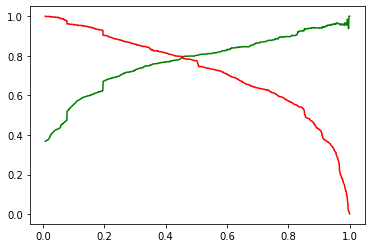

In [74]:
# Plotting Precession Recall curve
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conv_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Comparing the metric values of both train and test datasets, the model is behaving very similar on both the datasets.

# 4. Finding the Lead score value for conversion rate of 80%

In [75]:
# Observing the output dataframe from test dataset
print(y_pred_final.shape)
y_pred_final['Lead_Score %ge'] = y_pred_final.Conv_prob.map( lambda x: round(x*100))
y_pred_final.head()

(2438, 4)


,Lead_number,Converted,Conv_prob,final_predicted,Lead_Score %ge
0,3117,0,0.078521,0,8
1,5735,0,0.004405,0,0
2,3135,0,0.097972,0,10
3,1663,1,0.968896,1,97
4,3386,0,0.097619,0,10


In [76]:
# Observing the output from the train dataset
print(y_train_pred_final.shape)
y_train_pred_final.head(3)


(5686, 16)


,Converted,Conv_prob,Lead_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score %ge
0,0,0.432561,3994,0,1,1,1,1,1,0,0,0,0,0,1,43
1,0,0.098457,897,0,1,0,0,0,0,0,0,0,0,0,0,10
2,1,0.820911,4030,1,1,1,1,1,1,1,1,1,1,0,1,82


In [77]:
# Combining both the datasets
y_total = pd.concat([y_pred_final, y_train_pred_final], join = 'inner', axis = 0, ignore_index=True)
print(y_total.shape)
y_total.head(3)

(8124, 5)


,Lead_number,Converted,Conv_prob,final_predicted,Lead_Score %ge
0,3117,0,0.078521,0,8
1,5735,0,0.004405,0,0
2,3135,0,0.097972,0,10


In [78]:
# Sorting the dataframe in decresing order of Lead score
y_total = y_total.sort_values(by ='Lead_Score %ge', ascending=False)
y_total.head(3)

,Lead_number,Converted,Conv_prob,final_predicted,Lead_Score %ge
7993,3248,1,0.996770,1,100
3949,5337,0,0.996246,1,100
6202,7470,1,0.995888,1,100


In [80]:
# Slicing the dataframe at leadscore= 42
df_check = y_total[y_total['Lead_Score %ge']>42]
print('Conversion Probability: ',round((df_check['Converted'].sum())*100/len(df_check['Converted']),2), '%')

Conversion Probability:  80.07 %


#### By changing the Leadscore 42 in the above cell we can get the probability of conversion

# 5. Conclusion

1. The model behaves very similar on train and test dataset. Comparing the metrics.
2. As per this model, the marketing people have to select leads with a score above 42% to get a conversion rate of 80%

# END OF NOTEBOOK